In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path1 = "/content/gdrive/MyDrive/download.jpg"
img1 = cv.imread(path1, 0)

path2 = "/content/gdrive/MyDrive/download (1).jpg"
img2 = cv.imread(path2, 0)

First Image


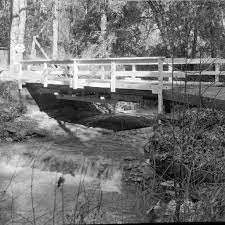



Second Image


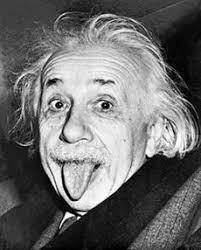

In [ ]:
#show images here
print("First Image")
cv2_imshow(img1)
print("\n")
print("Second Image")
cv2_imshow(img2)

# Histogram for the Original Images

In [ ]:
def histogram_equalization(img):
  frequency = np.array([0] * 256)

  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      frequency[img[row][col]]+=1


  plt.hist(img.ravel(), bins = 256)
  plt.title("Histogram for original image")
  plt.xlabel("Levels")
  plt.ylabel("Frequency")
  plt.show()

  frequency = frequency / (img.shape[0] * img.shape[1])

  mod_mapping = np.empty(256)
  total = 0
  for i in range(0, len(frequency)):
    mod_mapping[i] = (255 * frequency[i] + total)
    total = mod_mapping[i]

  mod_mapping = np.round(mod_mapping, 0)
  mod_mapping = mod_mapping.astype('int32')

  new_freq = np.empty(256)

  for i in range(0, 256):
    new_freq[mod_mapping[i]]+=1


  mod_img = np.zeros(shape=(img.shape[0], img.shape[1]))

  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      mod_img[row][col] = mod_mapping[img[row][col]]

  plt.hist(mod_img.ravel(), bins = 256)
  plt.title("Histogram after Equalization")
  plt.xlabel("Levels")
  plt.ylabel("Frequency")
  plt.show()
  return mod_img


#Images after Equilization

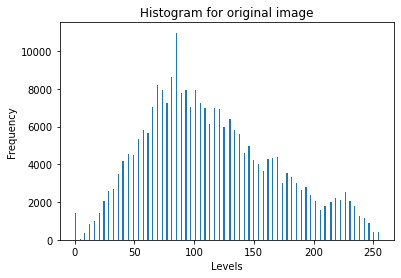

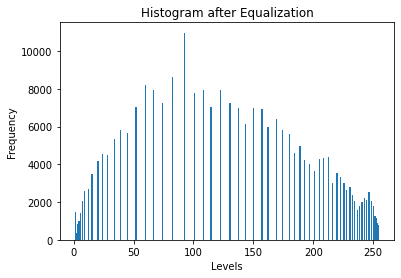

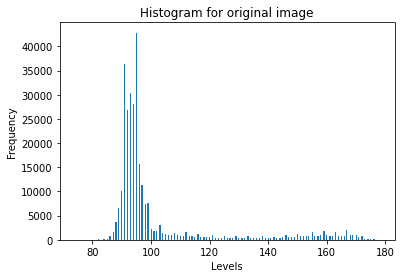

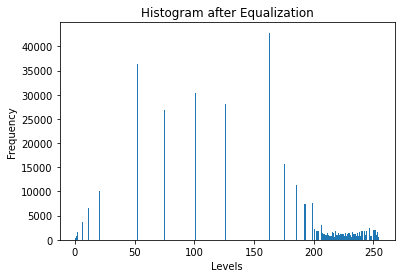

Image 1 after histogram Equalization


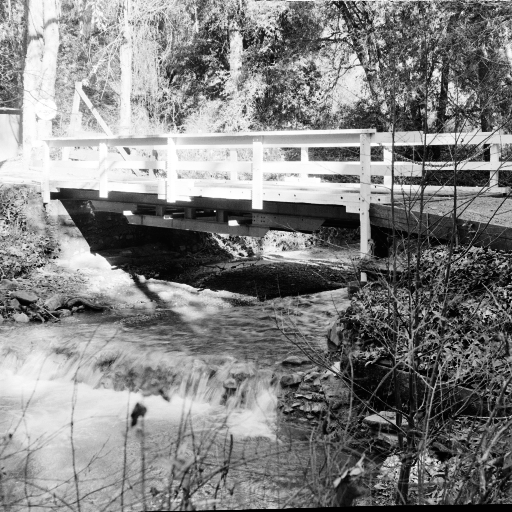



Image 2 after histogram Equalization


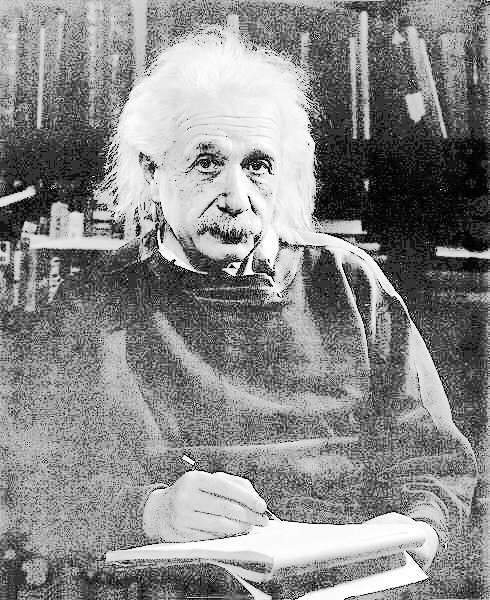

In [ ]:
mod_img1 = histogram_equalization(img1)
mod_img2 = histogram_equalization(img2)
print("Image 1 after histogram Equalization")
cv2_imshow(mod_img1)
print("\n")
print("Image 2 after histogram Equalization")
cv2_imshow(mod_img2)

#Histogram Specification

In [ ]:

def find_inverse_mapping(target, mod_mapping):
  prev = mod_mapping[0]
  index = 0

  for i in range(0, len(mod_mapping)):
    if(mod_mapping[i] == target):
      return i

    if (mod_mapping[i] > target):
      if (abs(mod_mapping[i] - target) > abs(target - prev)):
        return index
      else:
        return i

    if (mod_mapping[i] != prev):
      prev = mod_mapping[i]
      index = i

  return i-1


In [ ]:
def hist_match(img1, img2):
  #for image 1
  frequency = np.array([0] * 256)

  for row in range(img1.shape[0]):
    for col in range(img1.shape[1]):
      frequency[img1[row][col]]+=1


  plt.hist(img1.ravel(), bins = 256)
  plt.title("Histogram for original image")
  plt.xlabel("Levels")
  plt.ylabel("Frequency")
  plt.show()

  frequency = frequency / (img1.shape[0] * img1.shape[1])

  mod_mapping = np.empty(256)
  total = 0
  for i in range(0, len(frequency)):
    mod_mapping[i] = (255 * frequency[i] + total)
    total = mod_mapping[i]

  mod_mapping = np.round(mod_mapping, 0)
  mod_mapping = mod_mapping.astype('int32')

  #for image 2

  frequency2 = np.array([0] * 256)

  for row in range(img2.shape[0]):
    for col in range(img2.shape[1]):
      frequency2[img2[row][col]]+=1


  plt.hist(img2.ravel(), bins = 256)
  plt.title("Histogram for original image")
  plt.xlabel("Levels")
  plt.ylabel("Frequency")
  plt.show()

  frequency2 = frequency2 / (img2.shape[0] * img2.shape[1])

  mod_mapping2 = np.empty(256)
  total = 0
  for i in range(0, len(frequency2)):
    mod_mapping2[i] = (255 * frequency2[i] + total)
    total = mod_mapping2[i]

  mod_mapping2 = np.round(mod_mapping2, 0)
  mod_mapping2 = mod_mapping2.astype('int32')

  final_mapping = []

  val = 0
  for pixel in mod_mapping:
    val = find_inverse_mapping(pixel, mod_mapping2)
    final_mapping.append(val)

  final_mapping = np.array(final_mapping)

  mod_img1 = np.zeros(shape=(img1.shape[0], img1.shape[1]))

  for row in range(img1.shape[0]):
    for col in range(img1.shape[1]):
      mod_img1[row][col] = final_mapping[img1[row][col]]

  plt.hist(mod_img1.ravel(), bins = 256)
  plt.title("Histogram after Equalization")
  plt.xlabel("Levels")
  plt.ylabel("Frequency")
  plt.show()
  return mod_img1



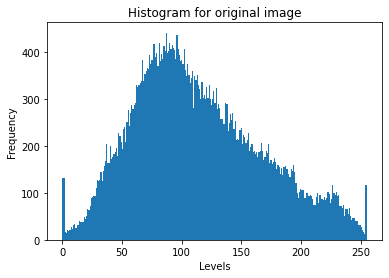

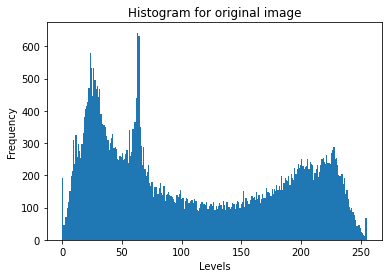

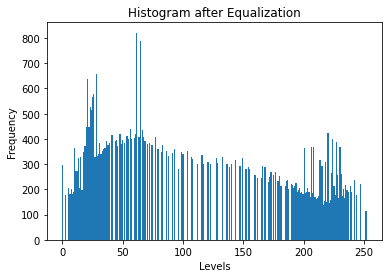

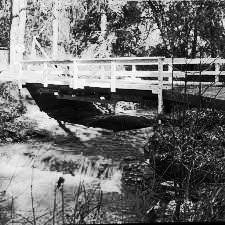

In [ ]:
# perform Histogram Matching
a = hist_match(img1, img2)
# Display the image
cv2_imshow(np.array(a,dtype='uint8'))

